# Using Data Science to Understand What Makes Wine Taste Good

이 노트북에서는 UCI 머신러닝 저장소의 와인 데이터셋(레드·화이트)을 불러와
- 기초 데이터 확인
- 간단한 통계 요약
- 특성 간 상관관계 시각화
- 이상치(Outlier) 탐지

단계별로 진행합니다.


In [2]:
# 데이터 처리 및 수치 계산
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
%matplotlib inline
sns.set_style('whitegrid')


In [10]:
# 레드 와인 데이터
red = pd.read_csv('./wine+quality/winequality-red.csv', sep=';')
# 화이트 와인 데이터 (선택)
white = pd.read_csv('./wine+quality/winequality-white.csv', sep=';')

# 데이터 프레임 구조 확인
print("Red wine shape:", red.shape)
print("White wine shape:", white.shape)

# 샘플 출력
display(red.head())


Red wine shape: (1599, 12)
White wine shape: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


winequality-red.csv와 winequality-white.csv를 로드

head()로 상위 5개 행 미리보기

In [11]:
# 결측치 확인
print("레드 와인 결측치:\n", red.isnull().sum())
print("\n화이트 와인 결측치:\n", white.isnull().sum())

# 데이터 타입 및 간략 정보
print("\n레드 와인 정보:")
red.info()


레드 와인 결측치:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

화이트 와인 결측치:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

레드 와인 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2

isnull().sum()으로 누락된 값 확인

info()로 각 열 데이터 타입 및 non-null 개수 파악

In [12]:
# 기술 통계량 요약 (소수점 반올림)
summary_stats = red.describe().round(2)
display(summary_stats)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산

volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음

citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음

residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함

chlorides : 염소화물: 와인의 염분량

free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함

total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남

density : 밀도: 알코올 및 당 함량에 따라 변함

pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임

sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용

alcohol : 와인의 알코올 함량 백분율

type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨

describe()로 평균, 표준편차, 사분위수 등 주요 통계량 제공

.round(2)로 소수점 둘째 자리까지 반올림

<AxesSubplot:xlabel='quality', ylabel='count'>

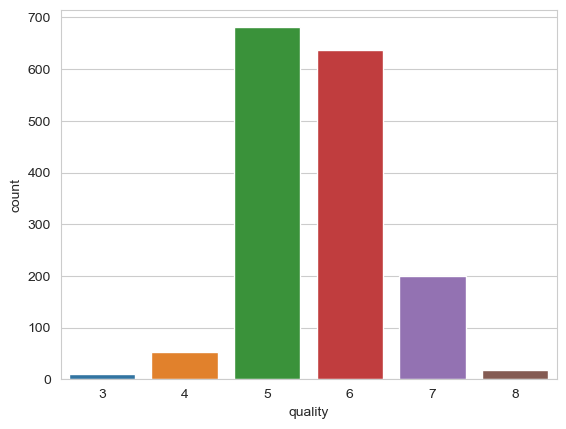

In [14]:
sns.countplot(x='quality', data=red)

quality 컬럼의 히스토그램 및 KDE 그리기

In [15]:
# 품질 기준 재분류
red['grade'] = pd.cut(
    red['quality'],
    bins=[0, 4, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# 등급별 빈도 확인
grade_counts = red['grade'].value_counts().sort_index()
display(grade_counts)


Low         63
Medium    1319
High       217
Name: grade, dtype: int64

quality를 1–4: Low, 5–6: Medium, 7–10: High로 구분

value_counts()로 각 등급별 샘플 수 확인

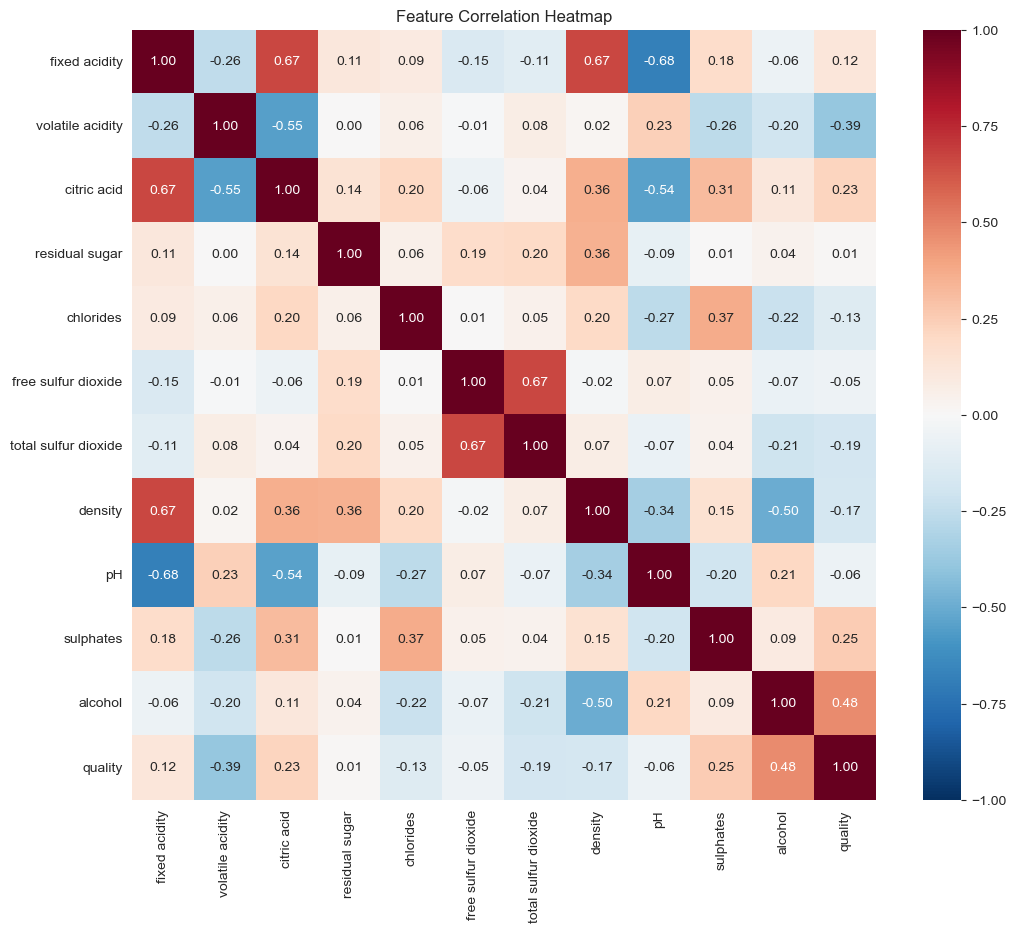

In [16]:
# 상관계수 계산
corr = red.corr()

# 히트맵 그리기
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


corr()로 상관행렬 생성

seaborn 히트맵으로 시각화하여 양·음 상관관계 파악

fixed acidity - citric acid : 산도와 구연산의 상관관계 : 0.67

fixed acidity - density : 산도와 밀도의 상관관계 : 0.67

free sulfur dioxide - total sulfur dioxide : 유리 이산화황과 총 이산화황의 상관관계 : 0.67

alcohol - quality : 알코올과 품질 : 0.48

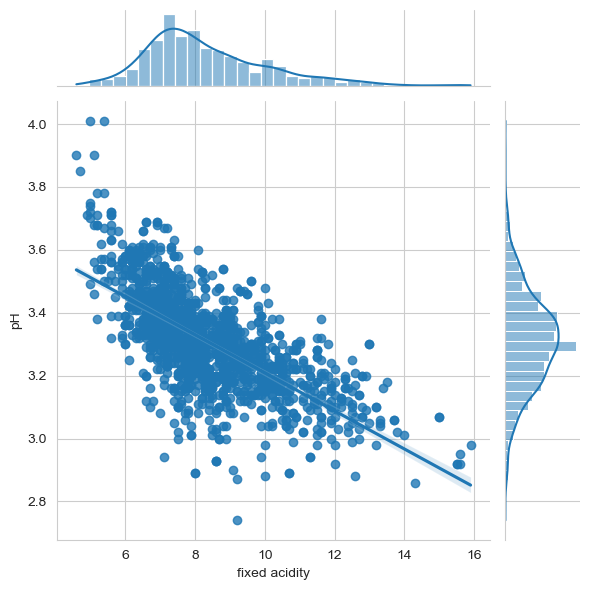

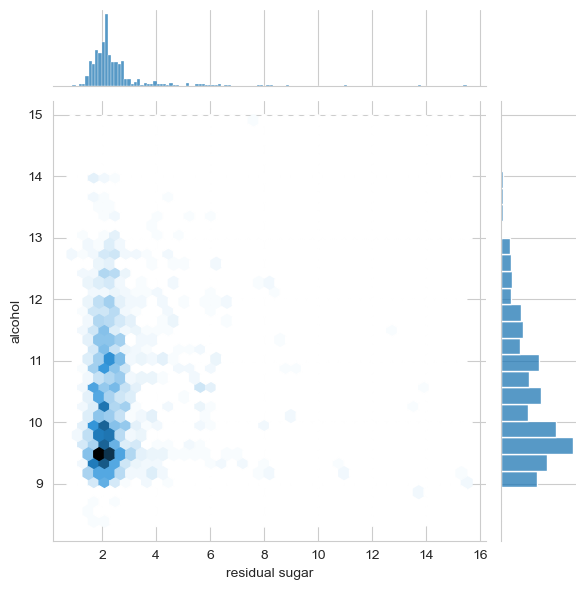

In [26]:
# pH vs. fixed acidity
sns.jointplot(x='fixed acidity', y='pH', data=red, kind='reg', height=6)
plt.show()

# residual sugar vs. alcohol
sns.jointplot(x='residual sugar', y='alcohol', data=red, kind='hex', height=6)
plt.show()


jointplot(kind='reg')으로 두 특성 간 회귀선 포함 산점도

kind='hex'으로 밀도 기반 육각 그래프

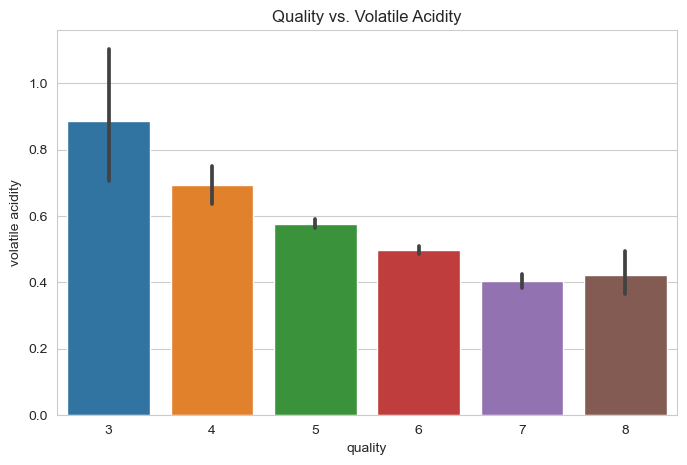

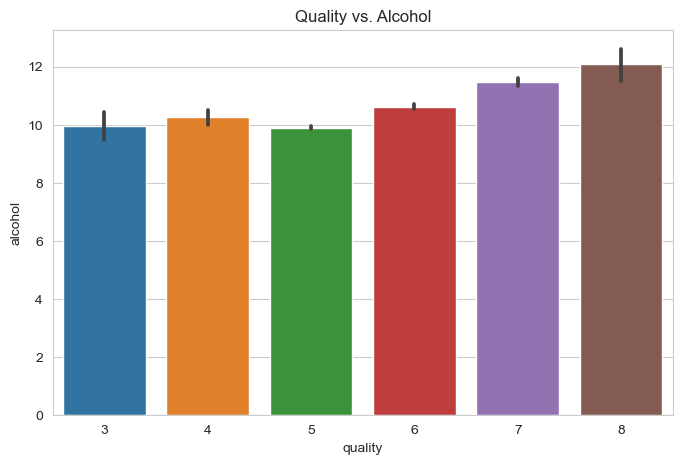

In [19]:
# Volatile acidity vs. Quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='volatile acidity', data=red)
plt.title('Quality vs. Volatile Acidity')
plt.show()

# Alcohol vs. Quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='alcohol', data=red)
plt.title('Quality vs. Alcohol')
plt.show()


In [27]:
# 이상치용 데이터프레임 복사
outliers_dict = {}

for feature in red.columns[:-2]:  # 마지막 grade, quality 제외
    Q1 = red[feature].quantile(0.25)
    Q3 = red[feature].quantile(0.75)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
    # 이상치 마스크
    mask = ~red[feature].between(Q1 - step, Q3 + step)
    outliers = red[mask]
    outliers_dict[feature] = outliers.shape[0]
    
# 각 특성별 이상치 개수 출력
outliers_count = pd.Series(outliers_dict)
display(outliers_count)


fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
dtype: int64

각 특성별 1.5×IQR 범위 밖의 값을 이상치로 간주

이상치 개수를 집계

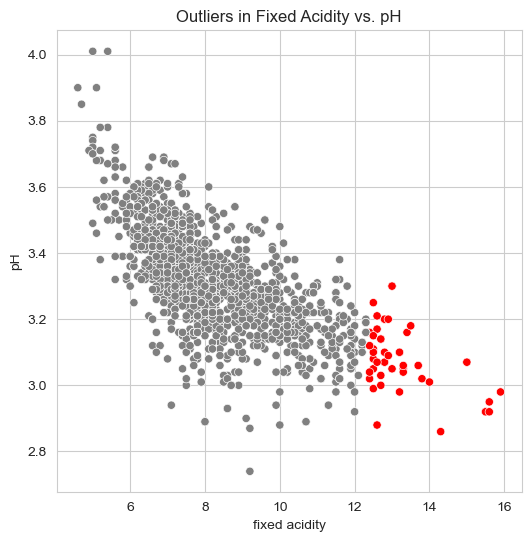

In [28]:
# 산점도로 이상치 확인 (fixed acidity vs. pH)
plt.figure(figsize=(6,6))
sns.scatterplot(
    x='fixed acidity', y='pH', data=red,
    hue=red['fixed acidity'].between(
        red['fixed acidity'].quantile(0.25) - 1.5 * (red['fixed acidity'].quantile(0.75) - red['fixed acidity'].quantile(0.25)),
        red['fixed acidity'].quantile(0.75) + 1.5 * (red['fixed acidity'].quantile(0.75) - red['fixed acidity'].quantile(0.25))
    ),
    palette={True:'grey', False:'red'},
    legend=False
)
plt.title('Outliers in Fixed Acidity vs. pH')
plt.show()


특정 특성의 이상치를 붉은색으로 강조한 산점도